## Task 1: Use the measures of central tendancy to identify the subject in which the students have shown thr best performance. While comparing the performance of three different subjects, one might just look at the average score in each subject and compare which subject has the highest average score and declare that subject as the one in which students have performed the best. Here, you need to look beyound the mean. 

In [1]:
import pandas as pd
import statistics as st

In [2]:
df=pd.read_csv('DS1_C4_S7_Students_Scores_Data_Practice.csv')
df

,Statistics,Python,Tableau
0,61,86,66
1,54,86,72
2,56,80,78
3,54,85,45
4,53,84,68
...,...,...,...
95,60,76,64
96,59,89,70
97,62,80,46
98,58,89,74


In [15]:
mean=[]
median=[]
mode=[]

for i in df:
    mean.append(df.loc[:,i].mean())
    median.append(df.loc[:,i].median())
    mode.append(st.mode(df[i]))

In [16]:
c1=['Statistics','Python','Tableau']
r1=['Mean','Median','Mode']
ct_df=pd.DataFrame([mean,median,mode],columns=[c1])
ct_df.insert(0,'Central_Tendancy',r1,True)
print(ct_df)

  Central_Tendancy Statistics Python Tableau
0             Mean      60.89  81.84   68.02
1           Median      60.00  82.00   69.00
2             Mode      55.00  86.00   65.00


### Interpretation: The above output shows that Python has the highest averge score among the rest of the subjects i.e, 81.84 hence the students have performed the best in Python.

## Task 2: Measure variability to identify the subject that shows the best performance for the class.

In [5]:
cv=[]
mean=[]
sd=[]
v=[]

for i in df:
    mean1=df.loc[:,i].mean()
    mean.append(mean1)
    sd1=df.loc[:,i].std()
    sd.append(sd1)
    v.append(sd1**2)
    cv.append(mean1/sd1*100)
    
    

In [6]:
r2=['Mean','Standar_deviation','Variance','Coefficient_variance']
md_df=pd.DataFrame([mean,sd,v,cv],columns=[c1])
md_df.insert(0,'Variability',r2,True)
md_df

,Variability,Statistics,Python,Tableau
0,Mean,60.890000,81.840000,68.020000
1,Standar_deviation,7.236126,4.345484,7.320899
2,Variance,52.361515,18.883232,53.595556
3,Coefficient_variance,841.472392,1883.334458,929.120921


## Task 3: Identify the subject in which the scores are the most skewed. 

In [7]:

for i in df:
    LO=[]
    UO=[]
    s1=pd.Series(df[i])
    
    Min=min(s1)
    Max=max(s1) 
    Range=Max-Min 
    
    Q1=s1.quantile(0.25) 
    Q3=s1.quantile(0.75) 
    IQR=Q3-Q1 
    UF=Q3+1.5*IQR 
    LF=Q1-1.5*IQR 
    
    for l in df[i]:
        if(l<LF):
            LO.append(l)
        if(l>UF):
            UO.append(l)
    
  
    if(i=="Statistics"):
        Statistics=['Statistics',Min, Max, Range, Q1, Q3, IQR, LF, UF,[LO,UO]]
    elif(i=="Python"):
        Python=['Python',Min, Max, Range, Q1, Q3, IQR, LF, UF,[LO,UO]]
    else:
        Tableau=['Tableau',Min, Max, Range, Q1, Q3, IQR, LF, UF,[LO,UO]] 
        
col_names=['i','Min','Max','Range','Q1','Q3','IQR','Lower Fence', 'Upper Fence','Outliers']

d_data=pd.DataFrame([Statistics, Python,Tableau],columns=col_names) 
print(d_data)

            i  Min  Max  Range    Q1     Q3    IQR  Lower Fence  Upper Fence  \
0  Statistics   50   74     24  54.0  67.00  13.00       34.500       86.500   
1      Python   75   89     14  78.0  86.00   8.00       66.000       98.000   
2     Tableau   45   79     34  64.0  73.25   9.25       50.125       87.125   

                         Outliers  
0                        [[], []]  
1                        [[], []]  
2  [[45, 50, 50, 50, 46, 46], []]  


## Task 4: Visually present the distribution of scores obtained by the students in different subjects using box plots. Identify the subject for which the scores are the most skewed. 

In [8]:
import matplotlib.pyplot as plt

stat=df['Statistics'].tolist()
py=df['Python'].tolist()
tablu=df['Tableau'].tolist()

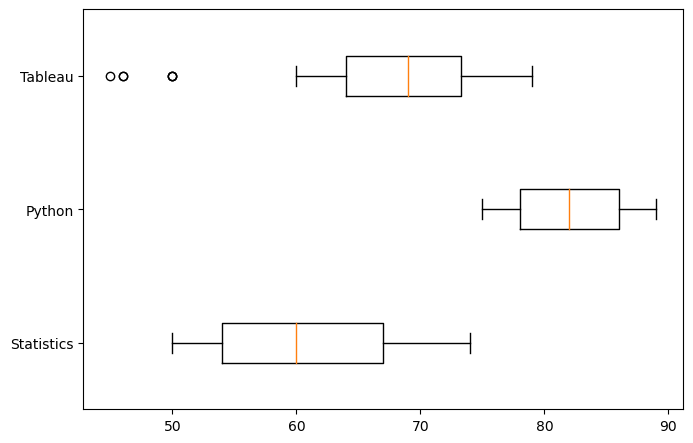

In [9]:
fig = plt.figure(figsize =(6, 4))
ax = fig.add_axes([0, 0, 1, 1])
plt.boxplot([stat,py,tablu],vert=0)
ax.set_yticklabels(['Statistics', 'Python','Tableau'])
plt.show()

### Interpretation: The above box plot indicates that only Tableau has outliers present in it. 

## Task 5: Present the distribution of data for each subject using normal distribution curves (bell curve). Observe and report the Kurtosis analysis for every subject.

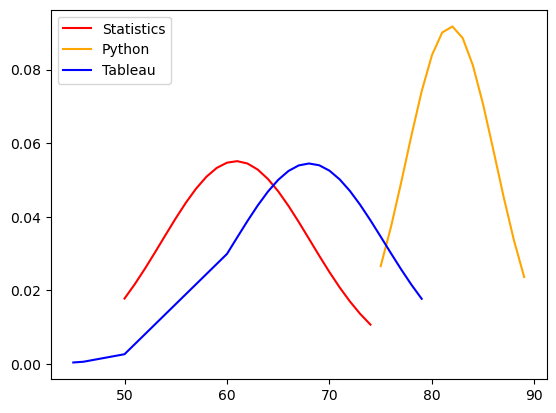

In [10]:
from scipy.stats import norm

stat1=sorted(stat)
py1=sorted(py)
tablu1=sorted(tablu)

s_mean = st.mean(stat)
s_sd = st.stdev(stat)
p_mean = st.mean(py)
p_sd = st.stdev(py)
t_mean = st.mean(tablu)
t_sd = st.stdev(tablu)


plt.plot(stat1, norm.pdf(stat1, s_mean, s_sd), color='red', label='Statistics')
plt.plot(py1, norm.pdf(py1, p_mean, p_sd),color='orange', label='Python')
plt.plot(tablu1, norm.pdf(tablu1, t_mean, t_sd), color='blue', label='Tableau')
plt.legend()
plt.show()


### Interpretation:  The above kurtosis visual show that 'Python' is Leptokurtic, where as 'Statistics' & 'Tableau' are Mesokurtic. Although the bell curve shows an abnormal in the visual hence it has outliers present in it.